In [35]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [38]:
train_data = pd.read_csv("train.csv", index_col=0)
test_data = pd.read_csv("test.csv", index_col=0)

In [31]:
train_data.head()

,self_eval,teacher_eval,extracurricular,district,SRP_1,SRP_2,SRP_3,SRP_4,SRP_5,SRP_6,...,SRP_42,SRP_43,SRP_44,SRP_45,SRP_46,SRP_47,SRP_48,SRP_49,SRP_50,y
SEQN,,,,,,,,,,,,,,,,,,,,,
969167,4,5,9,3,-0.181,-0.379,-0.164,0.080,0.378,1.581,...,-1.156,-0.730,-0.508,-0.497,0.224,0.412,-0.517,0.099,0.114,-1.315
188942,4,3,5,4,-0.126,1.603,1.021,0.489,-1.404,-0.955,...,-0.318,1.240,-1.993,2.021,-1.078,-0.277,0.802,0.253,-0.720,1.997
134058,1,2,8,5,0.724,-0.702,2.249,0.910,0.330,0.411,...,0.449,1.980,-0.401,-0.544,-0.944,1.592,0.875,-0.734,-2.336,3.709
124022,3,3,10,6,0.706,-0.302,1.023,-0.895,0.625,1.283,...,2.025,-2.289,-0.407,0.025,-0.515,0.408,1.380,-1.075,-2.451,1.155
685285,5,5,1,5,-0.350,-1.001,0.931,0.192,0.491,0.292,...,-0.118,-0.288,0.457,-0.566,0.822,-0.317,0.661,2.096,0.004,-1.960


In [32]:
test_data.head()

,self_eval,teacher_eval,extracurricular,district,SRP_1,SRP_2,SRP_3,SRP_4,SRP_5,SRP_6,...,SRP_41,SRP_42,SRP_43,SRP_44,SRP_45,SRP_46,SRP_47,SRP_48,SRP_49,SRP_50
SEQN,,,,,,,,,,,,,,,,,,,,,
492834,1,1,5,3,-0.873,-0.337,-0.350,0.845,-0.437,0.735,...,0.025,0.154,-0.417,-1.672,2.029,1.802,-0.302,0.051,-0.350,1.438
309349,3,2,9,6,-0.948,1.002,-0.936,-0.100,1.134,-0.065,...,0.079,0.189,1.065,-0.679,-2.169,1.265,0.828,0.078,-0.540,-1.024
468308,1,1,1,1,-0.356,0.283,0.708,0.740,-1.205,0.509,...,1.890,0.196,0.345,0.116,0.219,0.555,-0.829,0.019,0.906,2.146
838812,2,2,2,1,-0.135,-2.024,0.922,1.138,0.167,1.838,...,-0.035,0.496,-0.662,1.664,0.037,-1.263,0.043,-0.021,0.451,0.617
947936,4,4,8,6,-0.955,0.906,0.494,-0.020,-0.515,-0.242,...,0.698,0.004,0.044,-0.977,1.434,-0.747,0.453,0.573,-1.039,-0.782


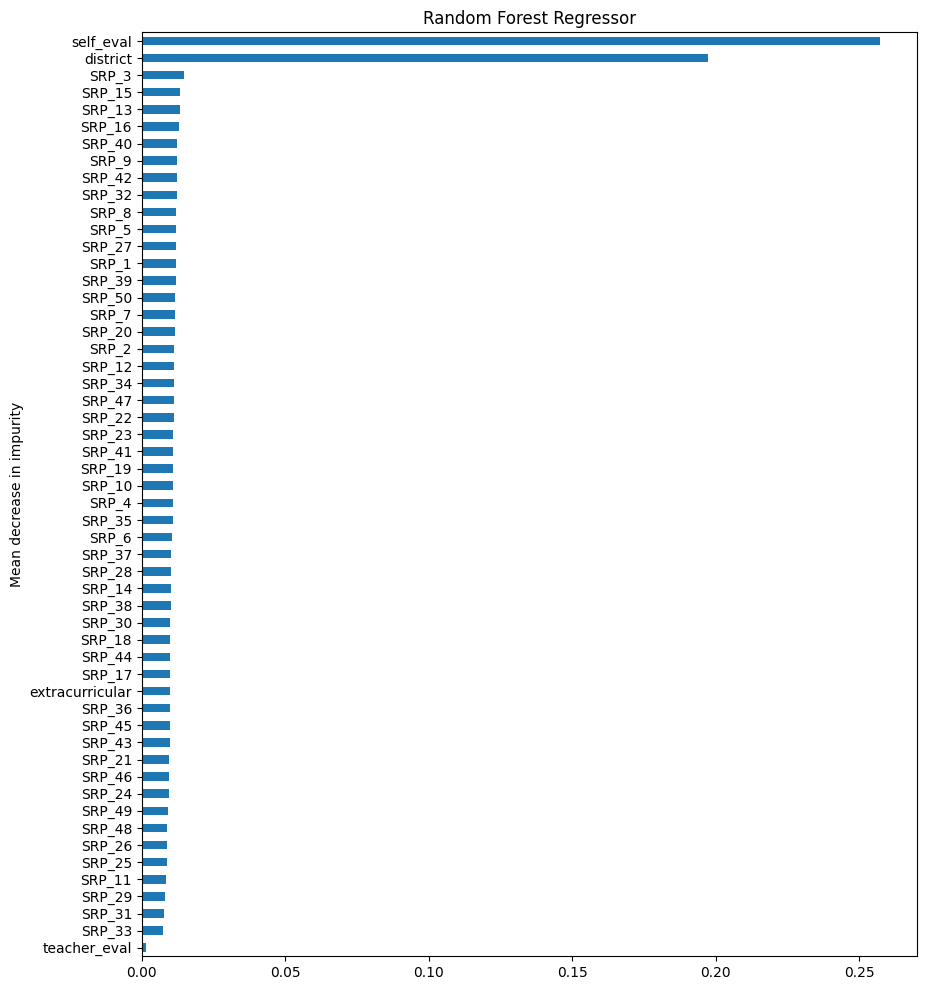

Out-of-Bag Score: 0.4126754550079036
Mean Squared Error: 0.19781967691
R-squared: 0.916172996091951


In [43]:
#Based on https://www.geeksforgeeks.org/random-forest-regression-in-python/
rfr = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

train_data_Y = train_data.loc[:, 'y']
train_data_X = train_data
train_data_X = train_data_X.drop(['y'], axis=1)
#test_data_Y = test_data.loc[:, 'y']
test_data_X = test_data
#test_data_X.drop(['y'], axis=1)

rfr.fit(train_data_X, train_data_Y)

accuracy_train = rfr.score(train_data_X, train_data_Y)
#accuracy_test = rf.score(test_data_X, test_data_Y)
train_error_rf = 1 - accuracy_train
#test_error_rf = 1 - accuracy_test

importances = rfr.feature_importances_
forest_importances = pd.Series(importances, index= rfr.feature_names_in_)

plt.figure(figsize=(10,12))
forest_importances.sort_values(ascending = True).plot.barh()
plt.title("Random Forest Regressor")
plt.ylabel("Mean decrease in impurity")
plt.show()

# Access the OOB Score
oob_score = rfr.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = rfr.predict(train_data_X)

# Evaluating the model
mse = mean_squared_error(train_data_Y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(train_data_Y, predictions)
print(f'R-squared: {r2}')

#print(f"RF training error: {train_error_rf}")
#print(f"RF test error: {test_error_rf}")